# **time series anomaly detection with lstm "deep-learning unit" autoencoder using keras**


In [1]:
#Importing libs
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


loading datasets

In [2]:
#dataset 1 Loading  

data = pd.read_csv("/content/drive/MyDrive/LSTM/Dataset1_Cleaned.csv",
                    parse_dates=["Date"],
                   index_col='Date' )
#dataset 2 Loading
data2 = pd.read_csv("/content/drive/MyDrive/LSTM/Datasets2_Cleanned.csv",
                    parse_dates=["Date"],
                   index_col='Date' )

# Print some data rows.
print(data.head(),data2.head())

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8             Sunspots
Date                
1749-01-01      58.0
1749-02-01      62.6
1749-03-01      70.0
1749-04-01      55.7
1749-05-01      85.0


Ploting to explore datasets


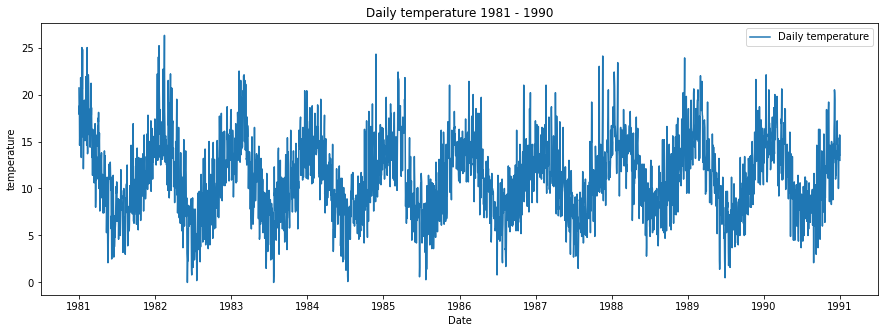

In [3]:
# Create a time series plot."Dataset-1"
plt.figure(figsize = (15, 5))
plt.plot(data, label = "Daily temperature")
plt.xlabel("Date")
plt.ylabel("temperature")
plt.title("Daily temperature 1981 - 1990")
plt.legend()
plt.show()

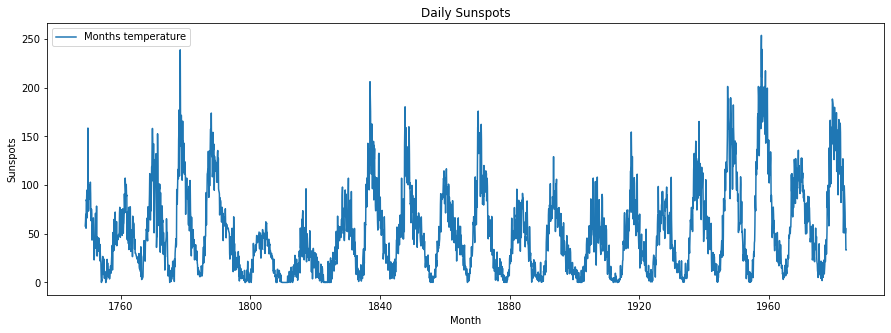

In [4]:
# Create a time series plot. "Dataset-2"
plt.figure(figsize = (15, 5))
plt.plot(data2, label = "Months temperature")
plt.xlabel("Month")
plt.ylabel("Sunspots")
plt.title("Daily Sunspots")
plt.legend()
plt.show()

import Kares from tensorflow 

In [5]:
#Importing libs

from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [6]:
# Get the raw data values from the pandas data frame.
data_raw = data.values.astype("float32")
data_raw2 = data2.values.astype("float32")


# We apply the MinMax scaler from sklearn
# to normalize data in the (0, 1) interval.

scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)
dataset2 = scaler.fit_transform(data_raw2)


# Print a few values.
print("\nData 1",dataset[0:5],"\nData 2",dataset2[0:5])


Data 1 [[0.7870723]
 [0.6806084]
 [0.7148289]
 [0.5551331]
 [0.6007605]] 
Data 2 [[0.22852638]
 [0.24665089]
 [0.2758077 ]
 [0.21946414]
 [0.33490935]]


In [7]:
# Using 65% of data for training, 40% for validation.
TRAIN_SIZE = 0.65

#Spliting Data 1
train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

#Spliting Data 2
train_size2 = int(len(dataset2) * TRAIN_SIZE)
test_size2 = len(dataset2) - train_size
train2, test2 = dataset2[0:train_size2, :], dataset2[train_size2:len(dataset2), :]


print("Number of entries (training set, test set): " + str((len(train), len(test))))
print("Number of entries (training set 2, test set 2): " + str((len(train2), len(test2))))

Number of entries (training set, test set): (2370, 1277)
Number of entries (training set 2, test set 2): (1829, 985)


In [8]:
test[:5]

array([[0.14828898],
       [0.15589355],
       [0.19011408],
       [0.22053234],
       [0.16730039]], dtype=float32)

In [9]:
# This helper function should be rewritten using numpy's shift function. See below.
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [10]:
# Create test and training sets for one-step-ahead regression.
window_size = 20
#data 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data 1 shape:")
print(train_X.shape)

#data 2 
train_X2, train_Y2 = create_dataset(train2, window_size)
test_X2, test_Y2 = create_dataset(test2, window_size)
print("Original training data 2 shape:")
print(train_X2.shape)


# Reshape the input data into appropriate form for Keras.
#data 1
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data 1 shape:")
print(train_X.shape)

#data 2
train_X2 = np.reshape(train_X2, (train_X2.shape[0], 1, train_X2.shape[1]))
test_X2 = np.reshape(test_X2, (test_X2.shape[0], 1, test_X2.shape[1]))
print("New training data 2 shape:")
print(train_X2.shape)

Original training data 1 shape:
(2349, 20)
Original training data 2 shape:
(1808, 20)
New training data 1 shape:
(2349, 1, 20)
New training data 2 shape:
(1808, 1, 20)


In [11]:
test[:5]

array([[0.14828898],
       [0.15589355],
       [0.19011408],
       [0.22053234],
       [0.16730039]], dtype=float32)

In [22]:
#the model function to avoid dublicated code 
def fit_model(train_X, train_Y, window_size = 1):

    model = keras.Sequential()
    model.add(keras.layers.LSTM(units=64,input_shape = (1, window_size)))
    model.add(keras.layers.Dense(8, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss = "mse", optimizer = "adam",metrics=['accuracy'])

    model.fit(train_X, 
              train_Y, 
              epochs = 40, 
              batch_size = 10, 
              validation_split=0.20,
              shuffle=False,
              verbose=0
              )
    
    return(model)


In [23]:
# Fit the model 1.
model1 = fit_model(train_X, train_Y, window_size)


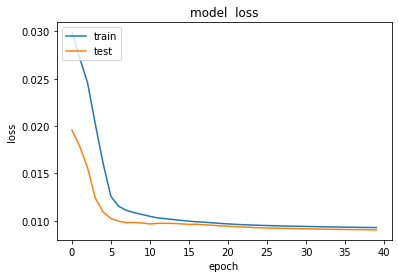

In [24]:
# summarize history for loss
plt.plot(model1.history.history['loss'])
plt.plot(model1.history.history['val_loss'])
plt.title('model  loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

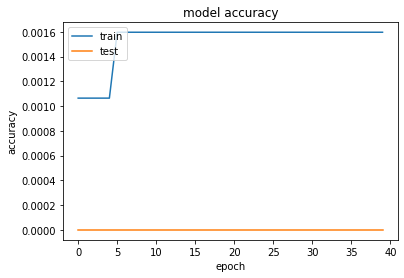

In [25]:
# summarize history for accuracy
plt.plot(model1.history.history['accuracy'])
plt.plot(model1.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
# Fit the model 2.
model2 = fit_model(train_X2, train_Y2, window_size)

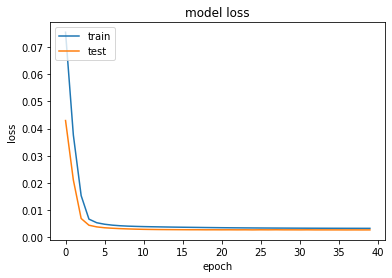

In [27]:
# summarize history for loss
plt.plot(model2.history.history['loss'])
plt.plot(model2.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

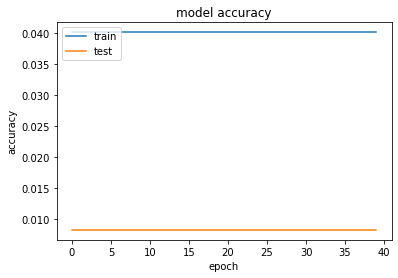

In [28]:
# summarize history for accuracy
plt.plot(model2.history.history['accuracy'])
plt.plot(model2.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)



#data 1

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data 1 score: %.2f RMSE" % rmse_train)
print("Test data 1 score: %.2f RMSE" % rmse_test)


#data 2
rmse_train2, train_predict2 = predict_and_score(model2, train_X2, train_Y2)
rmse_test2, test_predict2 = predict_and_score(model2, test_X2, test_Y2)

print("Training data 2 score: %.2f RMSE" % rmse_train2)
print("Test data 2 score: %.2f RMSE" % rmse_test2)

Training data 1 score: 24.10 RMSE
Test data 1 score: 22.86 RMSE
Training data 2 score: 14.43 RMSE
Test data 2 score: 18.23 RMSE


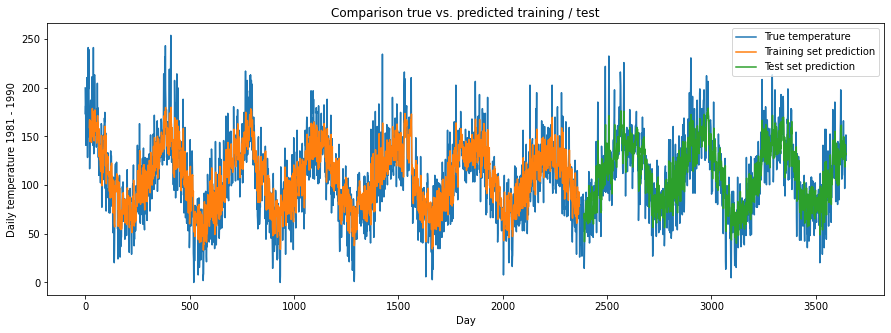

In [20]:
# Start with training predictions.
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
plt.figure(figsize = (15, 5))
plt.plot(scaler.inverse_transform(dataset), label = "True temperature")
plt.plot(train_predict_plot, label = "Training set prediction")
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Day")
plt.ylabel("Daily temperature 1981 - 1990")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()


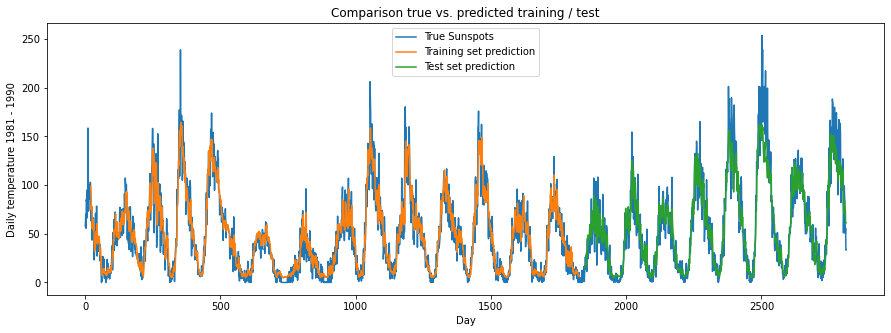

In [21]:
# Start with training predictions.
train_predict_plot2 = np.empty_like(dataset2)
train_predict_plot2[:, :] = np.nan
train_predict_plot2[window_size:len(train_predict2) + window_size, :] = train_predict2

# Add test predictions.
test_predict_plot2 = np.empty_like(dataset2)
test_predict_plot2[:, :] = np.nan
test_predict_plot2[len(train_predict2) + (window_size * 2) + 1:len(dataset2) - 1, :] = test_predict2

# Create the plot.
plt.figure(figsize = (15, 5))
plt.plot(scaler.inverse_transform(dataset2), label = "True Sunspots")
plt.plot(train_predict_plot2, label = "Training set prediction")
plt.plot(test_predict_plot2, label = "Test set prediction")
plt.xlabel("Day")
plt.ylabel("Daily temperature 1981 - 1990")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()